<a href="https://colab.research.google.com/github/Suryaprasadindra/ANN-CNN-TRANSFER-LEARNING/blob/main/ANN%2CCNN%26_TRANSFER_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


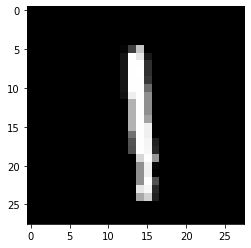

In [ ]:
plt.imshow(x_train[8],cmap='gray')

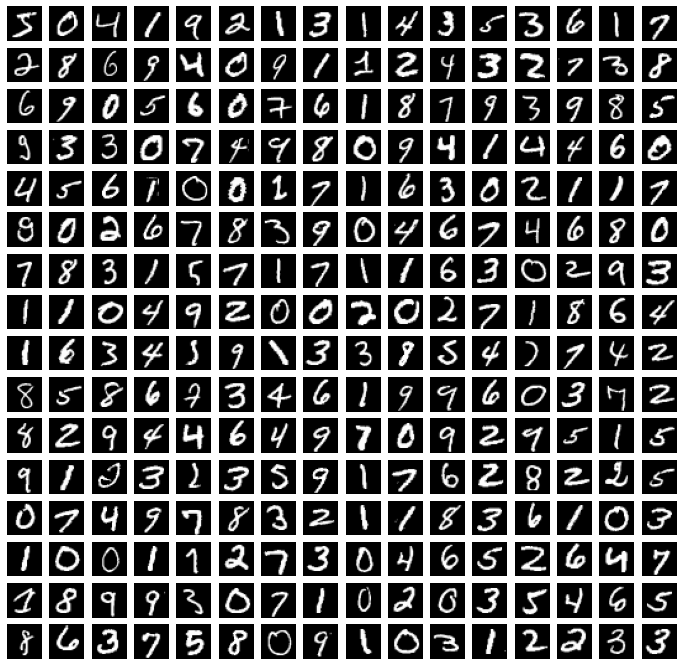

In [ ]:
plt.figure(figsize=[12,12])
for i in range(256):
  plt.subplot(16,16,i+1)
  plt.axis('off')
  plt.imshow(x_train[i],cmap='gray')

In [ ]:
x_train = x_train.reshape([60000,28,28,1])
x_test = x_test.reshape([10000,28,28,1])

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)   # one hot encoding
y_test = to_categorical(y_test,num_classes=10)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
train_datagen = ImageDataGenerator(
             rescale= 1/255,
             rotation_range= 10,
             width_shift_range=0.1,
             height_shift_range=0.1
)
train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train,y_train,batch_size=256)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1/255)
val_datagen.fit(x_test)
val_generator = val_datagen.flow(x_test,y_test)

In [ ]:
model = tf.keras.models.Sequential([
             tf.keras.layers.Flatten(input_shape=(28,28,1)),
             tf.keras.layers.Dense(256,activation='relu'),
             tf.keras.layers.Dense(128,activation='relu'),
             tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer = SGD(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs=40,
    verbose = 1
)

Epoch 1/40
235/235 [==============================] - 19s 70ms/step - loss: 2.0080 - accuracy: 0.3573 - val_loss: 1.3934 - val_accuracy: 0.7206
Epoch 2/40
235/235 [==============================] - 18s 76ms/step - loss: 1.4835 - accuracy: 0.5670 - val_loss: 0.8877 - val_accuracy: 0.8030
Epoch 3/40
235/235 [==============================] - 17s 72ms/step - loss: 1.2200 - accuracy: 0.6331 - val_loss: 0.7051 - val_accuracy: 0.8339
Epoch 4/40
235/235 [==============================] - 17s 70ms/step - loss: 1.0778 - accuracy: 0.6781 - val_loss: 0.6166 - val_accuracy: 0.8549
Epoch 5/40
235/235 [==============================] - 17s 71ms/step - loss: 0.9848 - accuracy: 0.7066 - val_loss: 0.5663 - val_accuracy: 0.8659
Epoch 6/40
235/235 [==============================] - 16s 70ms/step - loss: 0.9052 - accuracy: 0.7346 - val_loss: 0.5199 - val_accuracy: 0.8785
Epoch 7/40
235/235 [==============================] - 16s 68ms/step - loss: 0.8452 - accuracy: 0.7508 - val_loss: 0.4839 - val_accuracy:

In [ ]:
type(history)

keras.callbacks.History

In [ ]:
type(history.history)

dict

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.35725000500679016,
 0.5669666528701782,
 0.6331499814987183,
 0.6781499981880188,
 0.7066333293914795,
 0.7346166372299194,
 0.7507666945457458,
 0.7697333097457886,
 0.7861833572387695,
 0.800166666507721,
 0.8154500126838684,
 0.8269666433334351,
 0.8375999927520752,
 0.8468499779701233,
 0.853683352470398,
 0.862933337688446,
 0.8703166842460632,
 0.8772833347320557,
 0.8805166482925415,
 0.8860666751861572,
 0.8904666900634766,
 0.8949666619300842,
 0.8971166610717773,
 0.9008499979972839,
 0.9043166637420654,
 0.9069666862487793,
 0.9103500247001648,
 0.9101333618164062,
 0.9133333563804626,
 0.9161999821662903,
 0.9175666570663452,
 0.9190000295639038,
 0.9202333092689514,
 0.9211999773979187,
 0.9227833151817322,
 0.9251166582107544,
 0.9254666566848755,
 0.9271666407585144,
 0.9279833436012268,
 0.9290000200271606]

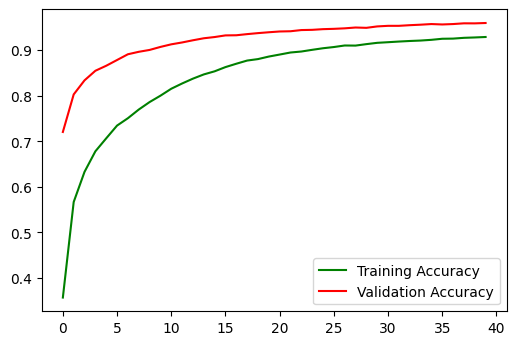

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(dpi =100)
plt.plot(acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.legend()


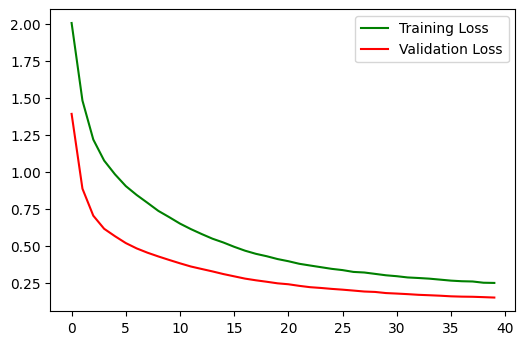

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(dpi = 100)
plt.plot(loss, color = 'green', label = 'Training Loss')
plt.plot(val_loss, color = 'red', label = 'Validation Loss')
plt.legend()

In [ ]:
model.predict(x_test[0:1])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

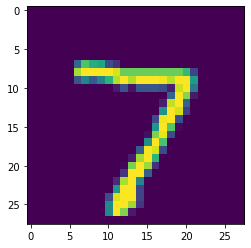

In [ ]:
plt.imshow(x_test[0].reshape(28,28))

In [ ]:
model.predict(x_test[0:10])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
pred = np.argmax(model.predict(x_test[0:10]),axis=1)
pred

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

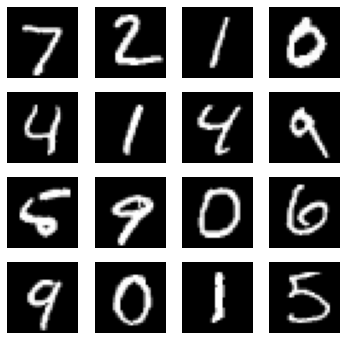

In [ ]:
plt.figure(figsize = (6,6))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.axis('off')
  plt.imshow(x_test[i].reshape([28,28]), cmap = 'gray')

In [ ]:
def detect_digit(x):
  pred = np.argmax(model.predict(x),axis=1)
  print('the given image is of digit :',pred[0])
  plt.figure()
  plt.axis('off')
  plt.imshow(x.reshape([28,28]),cmap='gray')

the given image is of digit : 7


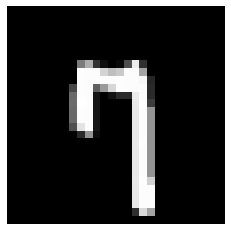

In [ ]:
detect_digit(x_test[80:81])

In [ ]:
from sklearn.metrics import confusion_matrix
pred_test = np.argmax(model.predict(x_test), axis = 1)
y_test = np.argmax(y_test, axis = 1)
cm = confusion_matrix(y_test, pred_test)

In [ ]:
from sklearn.metrics import confusion_matrix
pred_test = np.argmax(model.predict(x_test),axis=1)
y_test = np.argmax(y_test,axis=1)
cm = confusion_matrix(y_test,pred_test)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


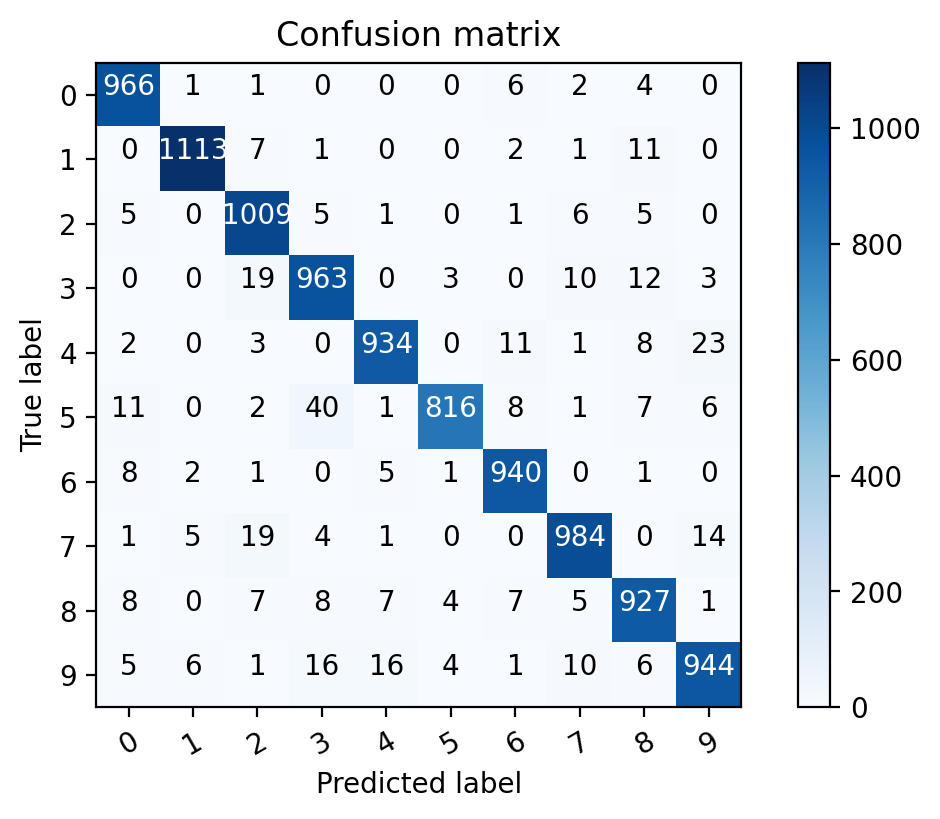

In [ ]:
plt.figure(dpi = 200)
classes = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(cm,classes)

# C N N PROJECT - 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


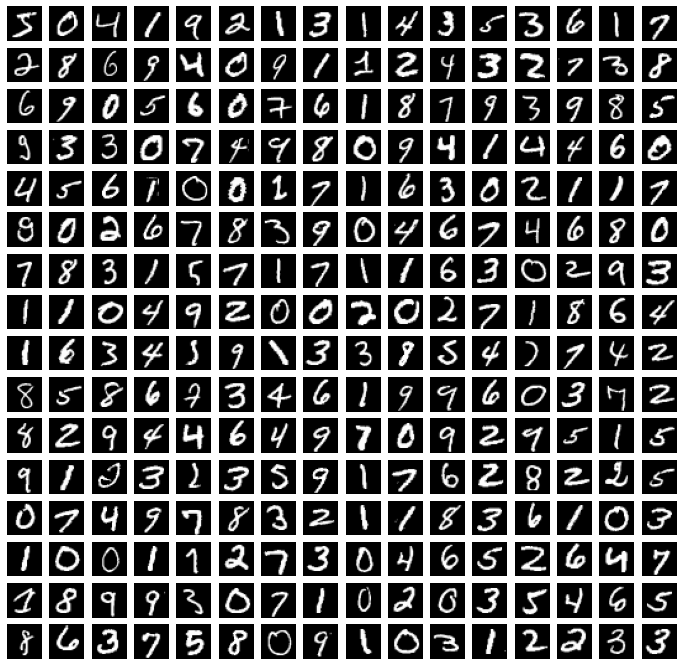

In [ ]:
plt.figure(figsize=(12,12))
for i in range(256):
  plt.subplot(16,16,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.axis('off')


In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

In [ ]:
x_train = x_train.reshape([60000,28,28,1])
x_test = x_test.reshape([10000,28,28,1])

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
y_train[0]         # probabilities for each class

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False 
)
train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train,y_train,batch_size=256)

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen.fit(x_test)
val_generator = val_datagen.flow(x_test,y_test)

**1st step model architecture**

In [ ]:
model = tf.keras.models.Sequential([
           tf.keras.layers.Conv2D(32,(5,5),padding='same',activation='relu',input_shape=(28,28,1)),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Flatten(),
           tf.keras.layers.Dense(256,activation='relu'),
           tf.keras.layers.Dense(10,activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

**2nd step compile**

In [ ]:
from tensorflow.keras.optimizers import SGD
optimizer = SGD()
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

**3rd step fit**

In [ ]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 40,
    verbose = 1
)

Epoch 1/40
235/235 [==============================] - 29s 76ms/step - loss: 2.2768 - accuracy: 0.2482 - val_loss: 2.2177 - val_accuracy: 0.5391
Epoch 2/40
235/235 [==============================] - 19s 79ms/step - loss: 2.0258 - accuracy: 0.5526 - val_loss: 1.2370 - val_accuracy: 0.8112
Epoch 3/40
235/235 [==============================] - 18s 76ms/step - loss: 0.9506 - accuracy: 0.7292 - val_loss: 0.3746 - val_accuracy: 0.9038
Epoch 4/40
235/235 [==============================] - 18s 75ms/step - loss: 0.5512 - accuracy: 0.8358 - val_loss: 0.2416 - val_accuracy: 0.9329
Epoch 5/40
235/235 [==============================] - 18s 75ms/step - loss: 0.3983 - accuracy: 0.8793 - val_loss: 0.1868 - val_accuracy: 0.9451
Epoch 6/40
235/235 [==============================] - 18s 76ms/step - loss: 0.3202 - accuracy: 0.9059 - val_loss: 0.1463 - val_accuracy: 0.9617
Epoch 7/40
235/235 [==============================] - 18s 76ms/step - loss: 0.2720 - accuracy: 0.9190 - val_loss: 0.1504 - val_accuracy:

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc =  history.history['val_accuracy']
val_loss =  history.history['val_loss']

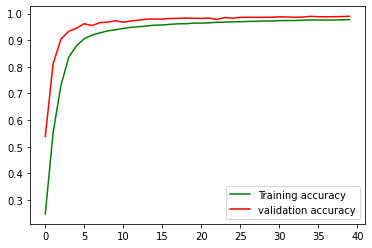

In [ ]:
plt.figure()
plt.plot(acc,color = 'green',label='Training accuracy')
plt.plot(val_acc,color = 'red',label='validation accuracy')
plt.legend()

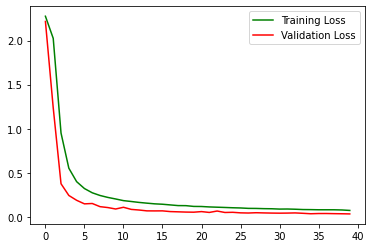

In [ ]:
plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [ ]:
model.predict(x_test[0:1])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

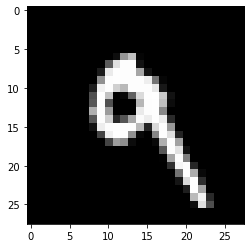

In [ ]:
plt.imshow(x_test[7].reshape([28,28]), cmap = 'gray')

In [ ]:
model.predict(x_test[0:10])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
pred = np.argmax(model.predict(x_test[0:16]), axis = 1)
pred

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5])

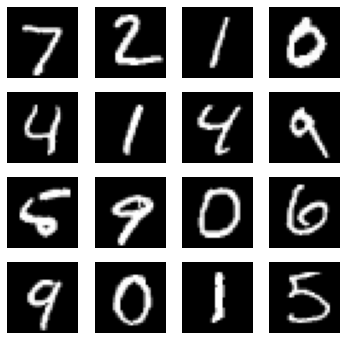

In [ ]:
plt.figure(figsize = (6,6))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.axis('off')
  plt.imshow(x_test[i].reshape([28,28]), cmap = 'gray')

In [ ]:
def detect_digit(x):
  pred = np.argmax(model.predict(x), axis = 1)
  print('The given image is of digit : ', pred[0])
  plt.figure()
  plt.axis('off')
  plt.imshow(x.reshape([28,28]), cmap = 'gray')

The given image is of digit :  7


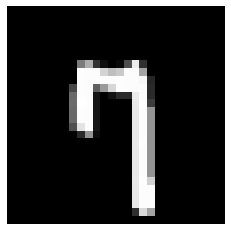

In [ ]:
detect_digit(x_test[80:81])

**metrics**

In [ ]:
from sklearn.metrics import confusion_matrix
pred_test = np.argmax(model.predict(x_test), axis = 1)
y_test = np.argmax(y_test, axis = 1)
cm = confusion_matrix(y_test, pred_test)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


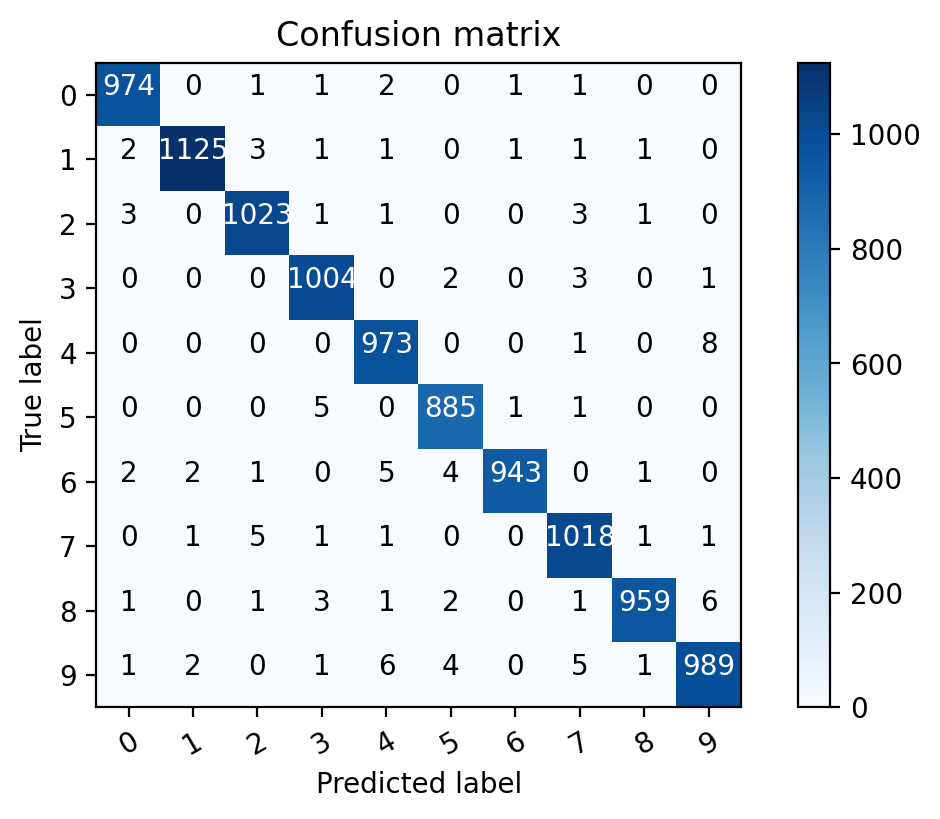

In [ ]:
plt.figure(dpi = 200)
classes = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(cm,classes)

#A N N VS C N N

# C N N PROJECT - 2

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-06-18 22:01:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   136MB/s    in 0.5s    

2022-06-18 22:01:38 (136 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os 
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
local_zip ='/tmp/cats_and_dogs_filtered.zip'

next unzip or extract

In [ ]:
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

creating paths

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'      # should remove the zip in the path
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

listing the contents of dir

In [ ]:
os.listdir(train_cats_dir)[:10]

['cat.683.jpg',
 'cat.551.jpg',
 'cat.796.jpg',
 'cat.589.jpg',
 'cat.867.jpg',
 'cat.525.jpg',
 'cat.797.jpg',
 'cat.424.jpg',
 'cat.734.jpg',
 'cat.419.jpg']

In [ ]:
print('Number of cat images for training   : ', len(os.listdir(train_cats_dir)))
print('Number of dog images for training   : ', len(os.listdir(train_dogs_dir)))
print('Number of cat images for validation : ', len(os.listdir(validation_cats_dir)))
print('Number of dog images for validation : ', len(os.listdir(validation_dogs_dir)))

Number of cat images for training   :  1000
Number of dog images for training   :  1000
Number of cat images for validation :  500
Number of dog images for validation :  500


In [ ]:
train_cat_images = os.listdir(train_cats_dir)[:36]
train_dog_images = os.listdir(train_dogs_dir)[:36]
print()
print(train_cat_images)
print(train_dog_images)


['cat.683.jpg', 'cat.551.jpg', 'cat.796.jpg', 'cat.589.jpg', 'cat.867.jpg', 'cat.525.jpg', 'cat.797.jpg', 'cat.424.jpg', 'cat.734.jpg', 'cat.419.jpg', 'cat.821.jpg', 'cat.937.jpg', 'cat.71.jpg', 'cat.356.jpg', 'cat.510.jpg', 'cat.760.jpg', 'cat.721.jpg', 'cat.785.jpg', 'cat.729.jpg', 'cat.928.jpg', 'cat.396.jpg', 'cat.920.jpg', 'cat.445.jpg', 'cat.207.jpg', 'cat.826.jpg', 'cat.923.jpg', 'cat.921.jpg', 'cat.749.jpg', 'cat.459.jpg', 'cat.710.jpg', 'cat.307.jpg', 'cat.640.jpg', 'cat.149.jpg', 'cat.255.jpg', 'cat.315.jpg', 'cat.250.jpg']
['dog.838.jpg', 'dog.373.jpg', 'dog.134.jpg', 'dog.971.jpg', 'dog.945.jpg', 'dog.218.jpg', 'dog.523.jpg', 'dog.532.jpg', 'dog.440.jpg', 'dog.356.jpg', 'dog.92.jpg', 'dog.726.jpg', 'dog.71.jpg', 'dog.351.jpg', 'dog.675.jpg', 'dog.694.jpg', 'dog.243.jpg', 'dog.518.jpg', 'dog.232.jpg', 'dog.406.jpg', 'dog.851.jpg', 'dog.774.jpg', 'dog.325.jpg', 'dog.249.jpg', 'dog.679.jpg', 'dog.695.jpg', 'dog.305.jpg', 'dog.296.jpg', 'dog.728.jpg', 'dog.375.jpg', 'dog.764.j

visualizing the images

In [ ]:
# these images are not in form of matrix so we cant use imshow function

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cat_image_path = os.path.join(train_cats_dir,'cat.683.jpg')
cat_image = mpimg.imread(cat_image_path) # this function reading the image and giving shape in the form of matrix
cat_image.shape

(396, 500, 3)

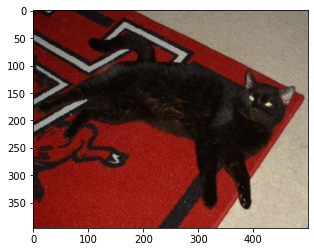

In [ ]:
plt.imshow(cat_image)

In [ ]:
dog_image_path = os.path.join(train_dogs_dir,'dog.838.jpg')
dog_image = mpimg.imread(dog_image_path)
dog_image.shape

(458, 499, 3)

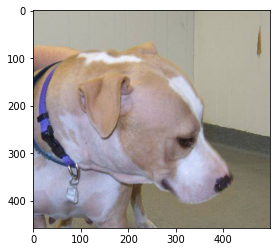

In [ ]:
plt.imshow(dog_image)

In [ ]:
cat_images_paths = [os.path.join(train_cats_dir,fname)for fname in train_cat_images]
cat_images_paths

['/tmp/cats_and_dogs_filtered/train/cats/cat.683.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.551.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.796.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.589.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.867.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.525.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.797.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.424.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.734.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.419.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.821.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.937.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.71.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.356.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.510.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.760.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.721.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.785.jpg',
 '/tmp/cats

In [ ]:
dog_images_paths = [os.path.join(train_dogs_dir,fname)for fname in train_dog_images]
dog_images_paths

['/tmp/cats_and_dogs_filtered/train/dogs/dog.838.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.373.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.134.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.971.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.945.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.218.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.523.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.532.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.440.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.356.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.92.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.726.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.71.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.351.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.675.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.694.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.243.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.518.jpg',
 '/tmp/cats_

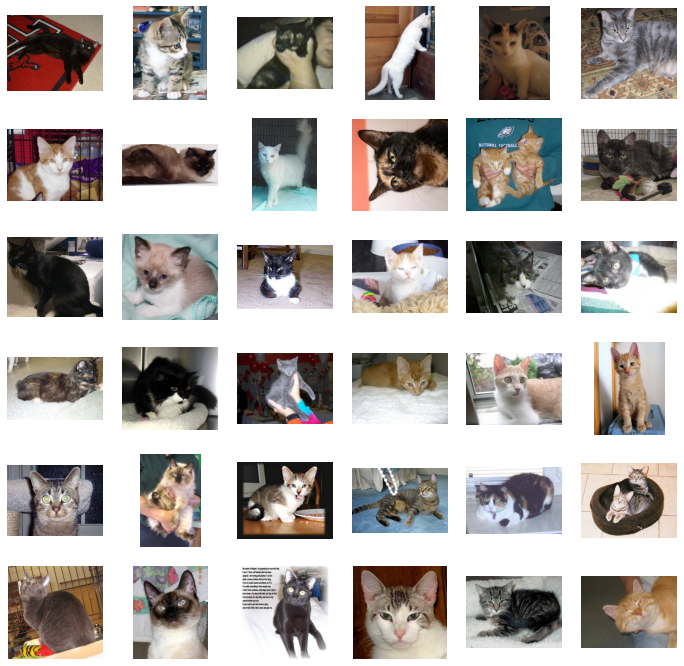

In [ ]:
plt.figure(figsize=(12,12))
i=1
for path in cat_images_paths:
  plt.subplot(6,6,i)
  plt.axis('off')
  cat_image = mpimg.imread(path)
  plt.imshow(cat_image)
  i+=1

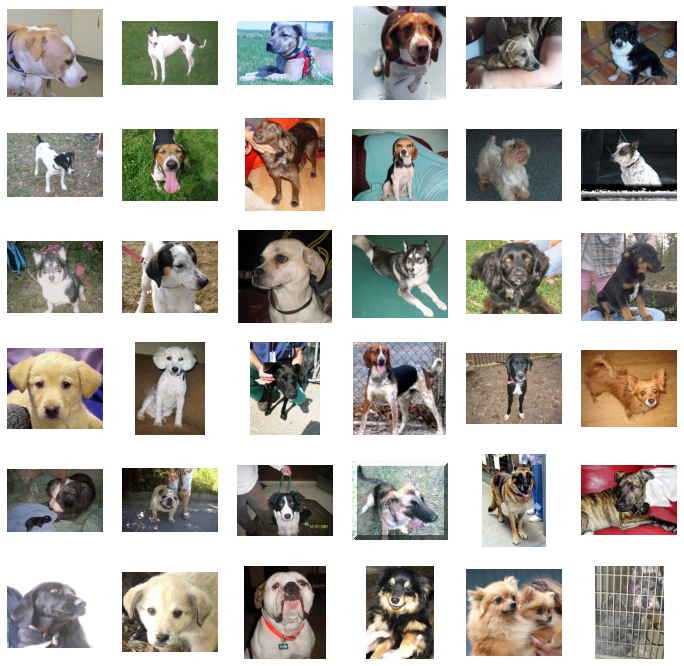

In [ ]:
plt.figure(figsize=(12,12))
i=1
for path in dog_images_paths:
  plt.subplot(6,6,i)
  plt.axis('off')
  dog_image = mpimg.imread(path)
  plt.imshow(dog_image)
  i+=1

image augmentation & preparing training ,validation dataset

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1 / 255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary'   # labels
    )

Found 2000 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [ ]:
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


model
1.building architecture

In [ ]:
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten

In [ ]:
model = tf.keras.models.Sequential()
model.add(Conv2D(64,(5,5),activation='relu',input_shape=(300,300,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 296, 296, 64)      4864      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 148, 148, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 73, 73, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 256)       295168    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 35, 35, 256)     

2.compile

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
    optimizer = RMSprop(lr=0.001),
    loss= 'binary_crossentropy',
    metrics = ['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


3.fit

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs = 40,
    verbose = 1
)


Epoch 1/40
63/63 [==============================] - 76s 901ms/step - loss: 4.9402 - accuracy: 0.5145 - val_loss: 0.6914 - val_accuracy: 0.5010
Epoch 2/40
63/63 [==============================] - 53s 839ms/step - loss: 0.7090 - accuracy: 0.5170 - val_loss: 0.7059 - val_accuracy: 0.5000
Epoch 3/40
63/63 [==============================] - 54s 851ms/step - loss: 0.7217 - accuracy: 0.5090 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/40
63/63 [==============================] - 52s 828ms/step - loss: 0.7042 - accuracy: 0.5135 - val_loss: 0.6922 - val_accuracy: 0.5120
Epoch 5/40
63/63 [==============================] - 52s 821ms/step - loss: 0.7077 - accuracy: 0.5110 - val_loss: 0.7335 - val_accuracy: 0.5000
Epoch 6/40
63/63 [==============================] - 53s 837ms/step - loss: 0.7143 - accuracy: 0.5105 - val_loss: 0.6910 - val_accuracy: 0.5070
Epoch 7/40
63/63 [==============================] - 52s 831ms/step - loss: 0.7134 - accuracy: 0.5105 - val_loss: 0.6915 - val_accuracy: 0.5120

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend()

NameError: ignored

In [ ]:
plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

NameError: ignored

# **TRANSFER LEARNING**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
Y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

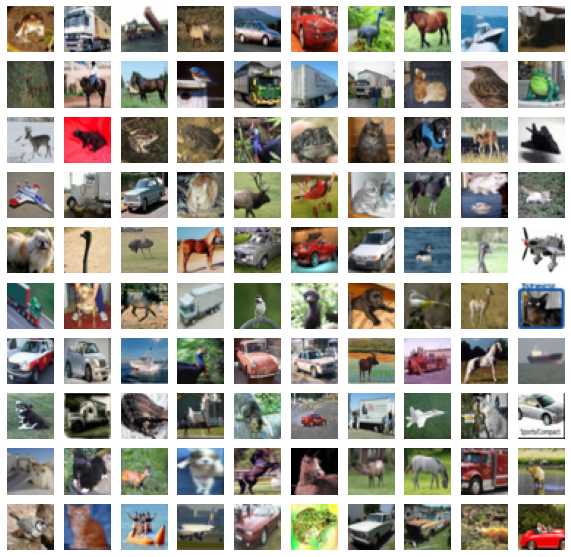

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(X_train[i])

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X_train,Y_train,test_size=0.2)

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_val = to_categorical(y_val,num_classes=10)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train = x_train / 255
X_test = X_test / 255
x_val  = x_val / 255

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    horizontal_flip = True
)
train_datagen.fit(x_train)

learning rate reduction

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(
            monitor = 'val_accuracy',
            patience = 3 , # if val acc is not increasing from last 3 epochs reduce lr
            factor = 0.5,
            min_lr = 0.00001
)

model

In [ ]:
model1 = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(64, (5,5), activation = 'relu',padding = 'same', input_shape = (32,32,3)),
                tf.keras.layers.Conv2D(64, (3,3), activation = 'relu',padding = 'same'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(128, (3,3), activation = 'relu',padding = 'same'),
                tf.keras.layers.Conv2D(128, (3,3), activation = 'relu',padding = 'same'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(256, activation = 'relu'),
                tf.keras.layers.Dense(10,activation = 'softmax')])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr = 0.001, momentum = 0.9)
model1.compile(optimizer = optimizer,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


NameError: ignored

In [ ]:
history1 = model1.fit(
          train_datagen.flow(x_train, y_train, batch_size = 128),
          validation_data = (x_val, y_val),
          epochs = 40,
          verbose = 1,
          callbacks = [learning_rate_reduction]
)

Epoch 1/40
313/313 [==============================] - 36s 79ms/step - loss: 2.2887 - accuracy: 0.1193 - val_loss: 2.2554 - val_accuracy: 0.1815 - lr: 0.0010
Epoch 2/40
313/313 [==============================] - 22s 72ms/step - loss: 2.0920 - accuracy: 0.2391 - val_loss: 1.9585 - val_accuracy: 0.2982 - lr: 0.0010
Epoch 3/40
313/313 [==============================] - 23s 73ms/step - loss: 1.9268 - accuracy: 0.3063 - val_loss: 1.9302 - val_accuracy: 0.3181 - lr: 0.0010
Epoch 4/40
313/313 [==============================] - 22s 69ms/step - loss: 1.8081 - accuracy: 0.3516 - val_loss: 1.7070 - val_accuracy: 0.3886 - lr: 0.0010
Epoch 5/40
313/313 [==============================] - 22s 69ms/step - loss: 1.6963 - accuracy: 0.3914 - val_loss: 1.5730 - val_accuracy: 0.4349 - lr: 0.0010
Epoch 6/40
313/313 [==============================] - 21s 68ms/step - loss: 1.6153 - accuracy: 0.4203 - val_loss: 1.5364 - val_accuracy: 0.4388 - lr: 0.0010
Epoch 7/40
313/313 [==============================] - 22s 

transfer learning model 

In [ ]:
vgg_model = tf.keras.applications.VGG19(
    include_top = False,
    weights = 'imagenet',
    input_shape = (32,32,3)
)

In [ ]:
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(vgg_model)
model2.add(Flatten())
model2.add(Dense(1024,activation = 'relu'))
model2.add(Dense(1024,activation = 'relu'))
model2.add(Dense(256,activation = 'relu'))
model2.add(Dense(10,activation = 'softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 1024)              525312    
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 21,864,266
Trainable params: 21,864,266


In [ ]:
optimizer = tf.keras.optimizers.SGD(lr = 0.001,momentum = 0.9)
model2.compile(optimizer = optimizer,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history2 = model2.fit(
    train_datagen.flow(x_train,y_train,batch_size = 128),
    validation_data = (x_val,y_val),
    epochs = 40,
    verbose = 1,
    callbacks = [learning_rate_reduction]
)


Epoch 1/40
313/313 [==============================] - 45s 104ms/step - loss: 1.3552 - accuracy: 0.5204 - val_loss: 0.9586 - val_accuracy: 0.6704 - lr: 0.0010
Epoch 2/40
313/313 [==============================] - 30s 95ms/step - loss: 0.8628 - accuracy: 0.6988 - val_loss: 0.7382 - val_accuracy: 0.7456 - lr: 0.0010
Epoch 3/40
313/313 [==============================] - 31s 99ms/step - loss: 0.7457 - accuracy: 0.7399 - val_loss: 0.6690 - val_accuracy: 0.7697 - lr: 0.0010
Epoch 4/40
313/313 [==============================] - 31s 99ms/step - loss: 0.6649 - accuracy: 0.7696 - val_loss: 0.6014 - val_accuracy: 0.7940 - lr: 0.0010
Epoch 5/40
313/313 [==============================] - 31s 98ms/step - loss: 0.6149 - accuracy: 0.7828 - val_loss: 0.5338 - val_accuracy: 0.8172 - lr: 0.0010
Epoch 6/40
313/313 [==============================] - 32s 104ms/step - loss: 0.5717 - accuracy: 0.8008 - val_loss: 0.6189 - val_accuracy: 0.7910 - lr: 0.0010
Epoch 7/40
313/313 [==============================] - 31

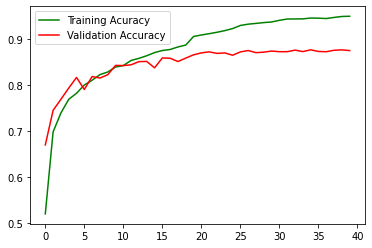

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend()

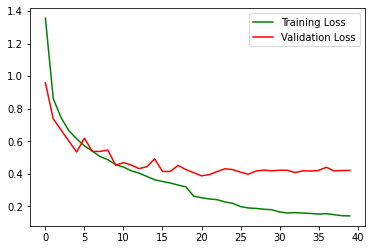

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [ ]:
#y_pred1 = np.argmax(model1.predict(X_test), axis = 1)
y_pred2 = np.argmax(model2.predict(X_test), axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
#print('Testing Accuracy Model1 : ', accuracy_score(Y_test, y_pred1))
print('testing Accuracy Model2 : ', accuracy_score(Y_test, y_pred2))

testing Accuracy Model2 :  0.8732


In [ ]:
cm = confusion_matrix(Y_test, y_pred2)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


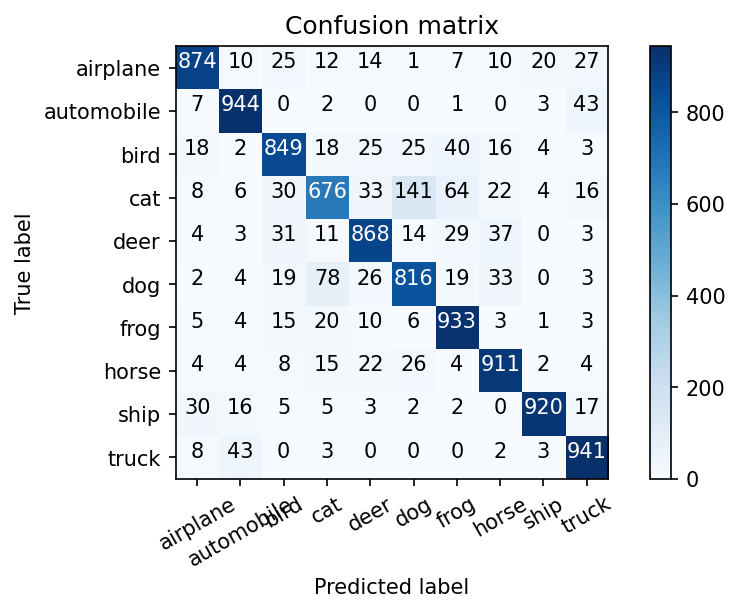

In [ ]:
plt.figure(dpi = 150)
plot_confusion_matrix(cm, classes)

**cifar 100 dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [ ]:
cifar100 = tf.keras.datasets.cifar100
(X_train,Y_train),(X_test,Y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

In [ ]:
Y_train[0:10]

In [ ]:
plt.figure(figsize = (10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(X_train[i])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X_train,Y_train,test_size=0.25) 

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes = 100)
y_val = to_categorical(y_val,num_classes = 100)

In [ ]:
y_val[0:1]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(X_test.shape)
print(Y_test.shape)

In [ ]:
x_train = x_train / 255
X_test = X_test / 255
x_val  = x_val / 255

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True
)
train_datagen.fit(x_train)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 3 ,       # if val acc is not increasing from last 3 epochs reduce lr
    factor = 0.5,
    min_lr = 0.00001
)

In [ ]:
vgg_model = tf.keras.applications.VGG19(
    include_top = False,
    weights = 'imagenet',
    input_shape = (32,32,3)
)

In [ ]:
vgg_model.summary()

In [ ]:
model = tf.keras.models.Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(500,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(100,activation = 'softmax'))
model.summary()

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=0.001,momentum = 0.9)

In [ ]:
model.compile(optimizer = optimizer,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
histort = model.fit(
    train_datagen.flow(x_train,y_train,batch_size = 128),
    validation_data = (x_val,y_val),
    epochs = 40,
    verbose = 1,
    callbacks = [learning_rate_reduction]
)

In [ ]:
acc = histort.history['accuracy']
val_acc = histort.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend()

In [ ]:
loss = histort.history['loss']
val_loss = histort.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

# **nureal style transfer**

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

read the image from uploaded photos

In [ ]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img,channels=3)
  img = tf.image.convert_image_dtype(img,tf.float32)
  img = img[tf.newaxis, : ]    # introducing new axis because it expects like (2,300,300,3) 4d
  return img

In [ ]:
content_image = load_image('/content/WhatsApp Image 2022-03-19 at 9.08.38 PM (1).jpeg')

In [ ]:
content_image.shape

TensorShape([1, 540, 720, 3])

In [ ]:
style_image = load_image('/content/WhatsApp Image 2022-03-19 at 9.08.40 PM.jpeg')

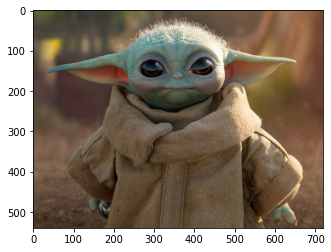

In [ ]:
plt.imshow(np.squeeze(content_image))  # again shaping into original shape to see or use this fun purpose then only we can see

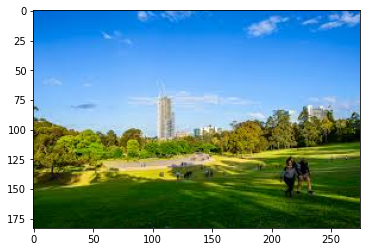

In [ ]:
plt.imshow(np.squeeze(style_image)) 

apply this style image on content image

In [ ]:
stylized_image = model(content_image,style_image)[0]

In [ ]:
stylized_image.shape

TensorShape([1, 540, 720, 3])

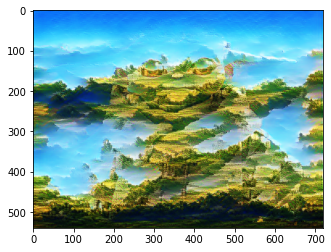

In [ ]:
plt.imshow(np.squeeze(stylized_image))

DOWNLOAD IMAGE

In [ ]:
cv2.imwrite('generated_image.jpg',cv2.cvtColor(np.squeeze(stylized_image)*255,cv2.COLOR_BAYER_BG2RGB))

error: ignored